<a href="https://colab.research.google.com/github/FARMAN311/CNN-Functional-Model/blob/main/Image_classification_using_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import tensorflow as tf
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_data_gen = ImageDataGenerator(rotation_range=50,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255)
valid_data_gen = ImageDataGenerator(rotation_range=45,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255)

test_data_gen = ImageDataGenerator(rescale=1./255)


In [8]:
import os
import random
import shutil

train_dir = '/content/drive/MyDrive/Image-Classification-Transfer-Learning-master/Dataset/training/'
validation_dir = '/content/drive/MyDrive/Image-Classification-Transfer-Learning-master/Dataset/validation/'

# Create validation folder if not exist
os.makedirs(validation_dir, exist_ok=True)

# Go through each category folder
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        images = os.listdir(category_path)
        random.shuffle(images)
        validation_count = int(len(images) * 0.2)  # 20% of the images

        validation_category_dir = os.path.join(validation_dir, category)
        os.makedirs(validation_category_dir, exist_ok=True)

        for image in images[:validation_count]:
            # Move file to validation folder
            shutil.move(os.path.join(category_path, image), validation_category_dir)


In [6]:
classes = os.listdir(train_dir)

In [7]:
classes

['school-bus',
 'lightning',
 'mountain-bike',
 'owl',
 'wine-bottle',
 'skyscraper',
 'sword',
 't-shirt',
 'sheet-music',
 'waterfall',
 'calculator',
 'laptop',
 'lightbulb',
 'galaxy',
 'kangaroo',
 'grand-piano',
 'fireworks',
 'computer-monitor',
 'airplanes',
 'bear']

In [8]:

classes = ['school-bus',
 'lightning',
 'mountain-bike',
 'owl',
 'wine-bottle',
 'skyscraper',
 'sword',
 't-shirt',
 'sheet-music',
 'waterfall',
 'calculator',
 'laptop',
 'lightbulb',
 'galaxy',
 'kangaroo',
 'grand-piano',
 'fireworks',
 'computer-monitor',
 'airplanes',
 'bear']

In [4]:
test_dir = "/content/drive/MyDrive/Image-Classification-Transfer-Learning-master/Dataset/test"

In [13]:
# Training
SEED = 1234
tf.random.set_seed(SEED)


train_gen = train_data_gen.flow_from_directory(train_dir,
                                               target_size=(256, 256),
                                               batch_size= 8,
                                               #classes=classes,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)
# Validation
valid_gen = valid_data_gen.flow_from_directory(validation_dir,
                                           target_size=(256, 256),
                                           batch_size=8,
                                           #classes=classes,
                                           class_mode='categorical',
                                           shuffle=False,
                                           seed=SEED)
# Test
test_gen = test_data_gen.flow_from_directory(test_dir,
                                             target_size=(256, 256),
                                             batch_size=10,
                                             shuffle=False,
                                             seed=SEED,
                                             class_mode=None,
                                             )




Found 656 images belonging to 20 classes.
Found 898 images belonging to 20 classes.
Found 0 images belonging to 0 classes.


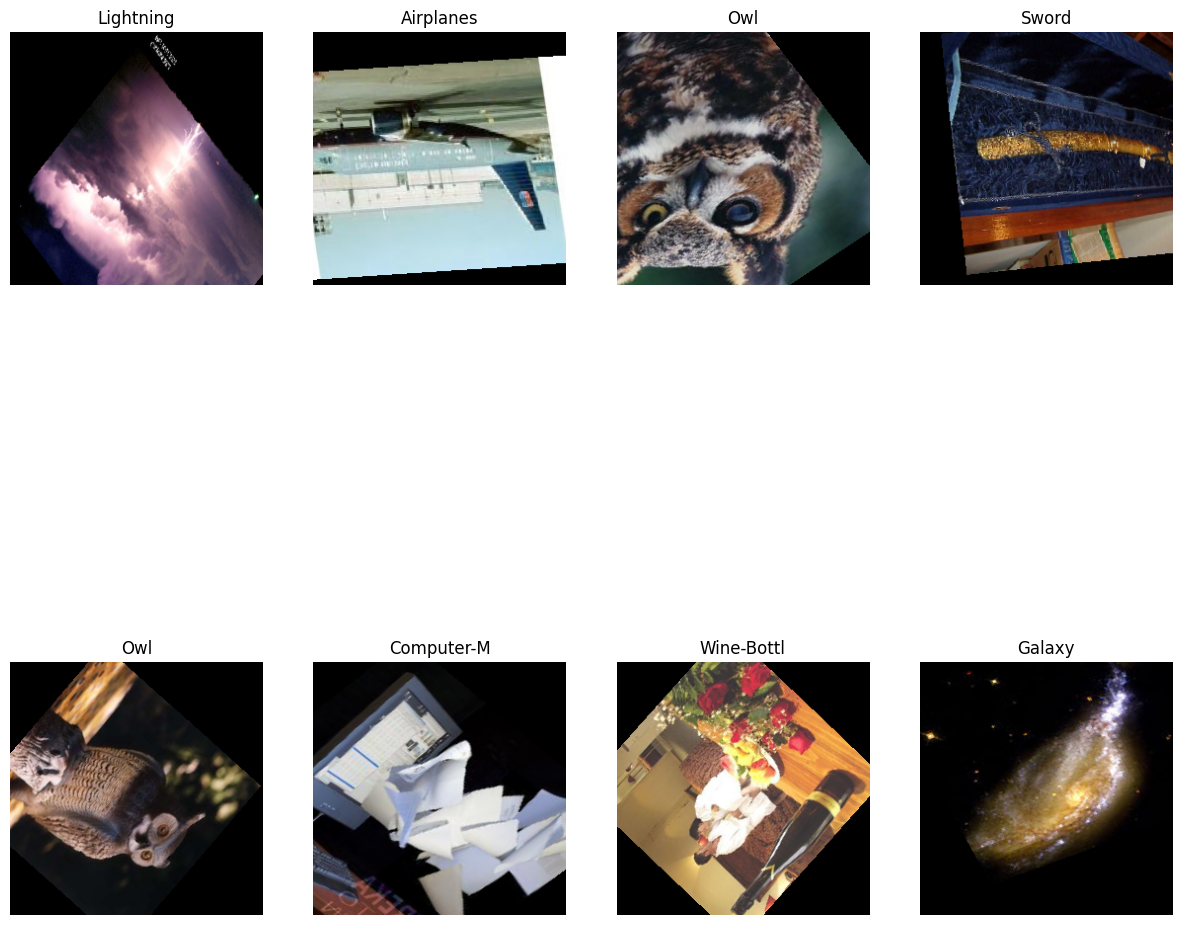

In [11]:
CLASS_NAMES = np.array(['school-bus','lightning','mountain-bike','owl','wine-bottle',
                        'skyscraper','sword','t-shirt','sheet-music','waterfall','calculator',
                        'laptop','lightbulb','galaxy','kangaroo','grand-piano','fireworks',
                        'computer-monitor','airplanes','bear'], dtype='<U10')

import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(15,15))
  for n in range(8):
      ax = plt.subplot(2,4,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_gen)
show_batch(image_batch, label_batch)

In [12]:
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=20, activation='softmax')(x)
model = Model(ResNet_model.input, output)


model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 64, 64, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 64, 64, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 66, 66, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 59,653,652 (227.56 MB)

 Trainable params: 6,841,364 (26.10 MB)

 Non-trainable params: 52,812,288 (201.46 MB)

In [14]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [15]:
y_train = train_gen.classes

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
# Assuming 'y_train' contains the true labels for your training data
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

lrr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=3,
                        verbose=1,
                        factor=0.4,
                        min_lr=0.0001)


callbacks = [lrr]

train_step_size = train_gen.n//train_gen.batch_size
valid_step_size = valid_gen.n//valid_gen.batch_size
history = model.fit(train_gen,
                   steps_per_epoch=train_step_size,
                   validation_data=valid_gen,
                   validation_steps=valid_step_size,
                   epochs=20,
                  callbacks=callbacks,
                  class_weight = class_weights_dict,


)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 639s 6s/step - accuracy: 0.3455 - loss: 2.3478 - val_accuracy: 0.6726 - val_loss: 4.2124 - learning_rate: 0.0010
Epoch 2/20
  1/101 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.8750 - loss: 0.5793

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8750 - loss: 0.5793 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 302ms/step - accuracy: 0.6965 - loss: 1.2130 - val_accuracy: 0.7908 - val_loss: 1.8157 - learning_rate: 0.0010
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7500 - loss: 0.8610 - val_accuracy: 1.0000 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7749 - loss: 0.8152
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
101/101 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.7749 - loss: 0.8157 - val_accuracy: 0.7092 - val_loss: 4.5158 - learning_rate: 0.0010
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8750 - loss: 0.9045 - val_accuracy: 0.1429 - val_loss: 3.4727 - learning_rate: 4.0000e-04
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - accuracy: 0.8191 - los

### Visualization accuracy and loss

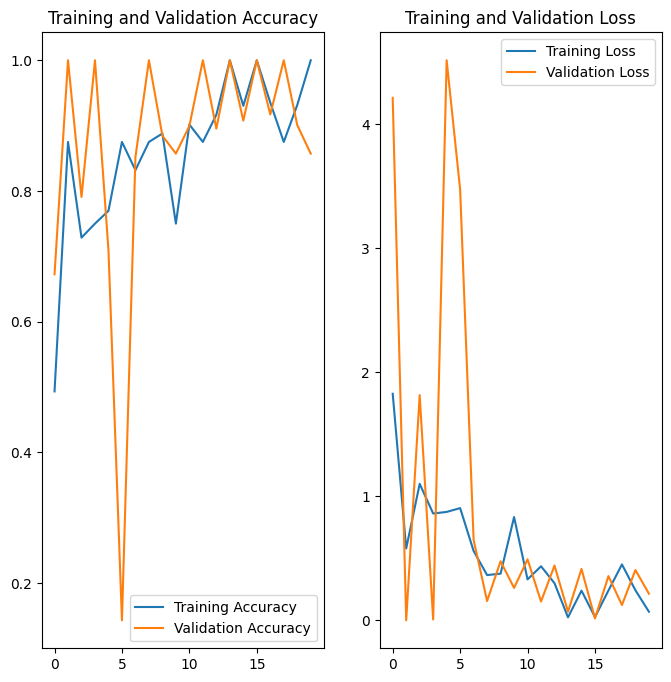

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.evaluate(valid_gen, steps=valid_step_size,verbose=1)

92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.9001 - loss: 0.3913


[0.37098750472068787, 0.9103260636329651]

## model prediction with test data

In [25]:
import cv2

In [26]:
test_step_size=test_gen.n//test_gen.batch_size
test_gen.reset()

for data_batch, labels_batch in test_gen:
    first_image = data_batch[0]
    # Use cv2 to display the image since matplotlib might not work with all image formats.
    cv2.imshow('First Image', first_image)
    cv2.waitKey(0)  # Wait for a key press
    cv2.destroyAllWindows()
    break

pred=model.predict(test_gen,
steps=test_step_size,
verbose=1)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)


### CSV file for kaggle submission

In [ ]:
import pandas as pd
labels = train_gen.class_indices
labels = dict((v,k) for k,v in labels.items())
predictions = [k for k in predicted_class_indices]

filenames=test_gen.filenames
FN=[]
for i in filenames:
  f = i[5:]
  FN.append(f)


results=pd.DataFrame({"Id":FN,
                      "Category":predictions})
results.to_csv("submission.csv",index=False)